## Solving bidomain equations on rectangular domain with the Aliev-Panfilov model - literature

### Importing required libraries

In [1]:
%cd ..
from src.dynamics_models import *
from src.cell_models import *
from src.utils import *

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-misica


### Defining a domain, cell model and dynamics model and visualizing initial data

In [2]:
domain = rectangle(1, 1, 100, 100)

In [3]:
class Model(MonodomainModel):
    def initial_V_m(self):
        def value(x):
            return np.exp(-(x[0] ** 2 + x[1] ** 2) / 0.25)

        self.V_m_n.interpolate(value)
        return self.V_m_n

    def conductivity(self):
        self.M_i = 0.012 * ufl.Identity(2)

In [4]:
cell_model = AlievPanfilov(domain)
model = Model(domain, cell_model)

In [5]:
plot_function(model.initial_V_m())

Widget(value='<iframe src="http://localhost:35477/index.html?ui=P_0x7f6a2364b9d0_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [6]:
model.solve(
    T=50,
    steps=100,
    lambda_=1,
    save_to="test_AP.mp4",
    camera_direction="xy",
    zoom=0.9,
    clim=[0, 1],
    cmap="turbo",
    signal_point=[0.7, 0.7, 0],
    checkpoints=[i * 50 for i in [0, 0.15, 0.35, 0.55, 0.75, 0.9]],
    checkpoint_file="test_AP",
)

Solving problem: 100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


### Visualizing action potential

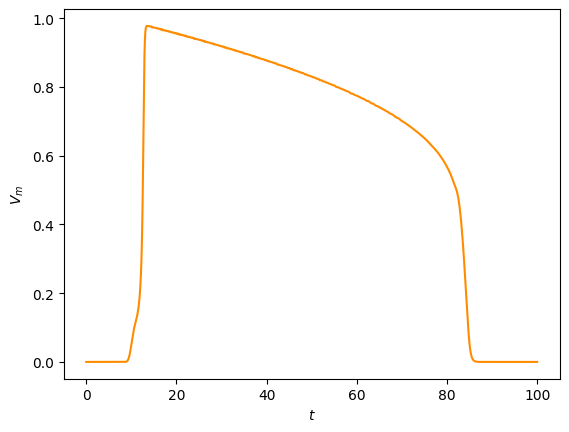

V= 1.9586321079921694e-07 , w= 1.2261051059762933 at t= 100.0


In [7]:
cell_model = AlievPanfilov(domain)
cell_model.visualize(T=100, I_app_value=0.1, I_app_time=10, I_app_duration=1, V_0=0, w_0=0)

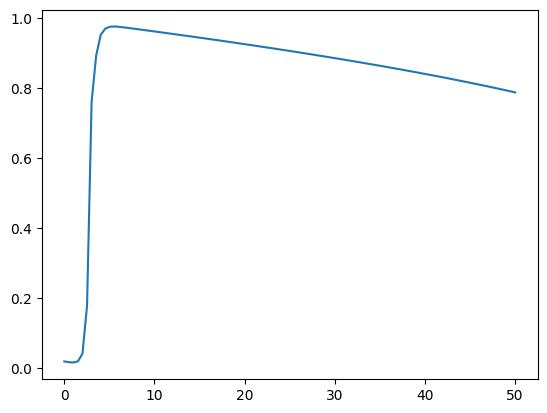

In [8]:
plt.plot(model.time, model.signal)